#Introduction# 

This code will do the following works:
1. Load a model file that is used to predict the covid-19 results. To reproduce it, you will need to set the directory correctly.
2. Show the result images using the explainability method Saliency Mapping.

Since I write the code in google colab, I suggest you also work with google colab to avoid potential setup issues.

# Preparing updated covid-cxr #

This project is based on the previous work from https://github.com/aildnont/covid-cxr. However, the original code is developed under windows which do not work on a Mac. It also cannot run in the python environment other than version 3.6. It only works with tensorflow_gpu and etc.

I fixed most of the issues and did the following work for our project:
1. Preprocess the data and generate train, test, validation, and store this information in three separate files (covid-cxr/data/processed/train_set.csv, covid-cxr/data/processed/test_set.csv, covid-cxr/data/processed/val_set.csv);
2. Modify the config.yml which defines the parameters;
3. Store all the images files which used to predict;
4. Generate the model files and store them in the following directory (covid-cxr/results/models).


To make it easy, I shared all codes, data, and models with the public, and you can access them through the below link.
https://drive.google.com/drive/folders/1wyvVPx9TvArGIldJkDpQfLRufwKZOTKQ?usp=sharing

You have two ways to use it:
1. The fast way to use it is as below:
Step 1. Login to your google drive and paste the above link to your browser;
Step 2. Right-click the folder name *covid-cxr* and click *Add shortcut to Drive*. Now, if you connect your google drive in colab, you will see the covid-cxr directory has been linked in your home.

The code connects your google drive in colab environment:

```
from google.colab import drive
drive.mount('/content/drive')
```

2. You can also choose to download the whole directory as a zip file, and upload it to your google colab directory. Since it is huge (3GB), it could be slow.

#Install tf_keras_vis#
I use tf_keras_vis to generate the result images using saliency mapping. It is not installed in google colab environment by default. So I install it using the below command:

In [34]:
!pip install tf_keras_vis 

#Import libraries#


In [35]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

#Load h5 model#

My model file is saved in the google cloud. The below code demonstrate the way I use it. I also reuse the config.yml file.

If you want to reproduce with your h5 file, you should reset your path.

In [36]:
from google.colab import drive
drive.mount('/content/drive')
covid_cxr = '/content/drive/MyDrive/covid-cxr/'

import os
import yaml
cfg = yaml.safe_load(open(covid_cxr + "config.yml", 'r'))

h5_path = covid_cxr + cfg['PATHS']['MODEL_TO_LOAD']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load model and print summary#

In [37]:
from keras.models import load_model

saved_model = load_model(h5_path, compile=False)
saved_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv0_0 (Conv2D)               (None, 224, 224, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 16  64         ['conv0_0[0][0]']                
 alization)                     )                                                             

#Load images#

In [38]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Image titles
image_titles = ['Covid', 'Non Covid']

# Load images and convert them to a Numpy array
img1 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00001.jpg', target_size=(224, 224)) # COVID
img2 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00002.jpg', target_size=(224, 224)) # Non-COVID

img4 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00004.jpg', target_size=(224, 224)) # COVID
img5 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00005.jpg', target_size=(224, 224)) # Non-COVID

img6 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00006.jpg', target_size=(224, 224)) # COVID
img7 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00007.jpg', target_size=(224, 224)) # Non-COVID

img9 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00009.jpg', target_size=(224, 224)) # COVID
img10 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00010.jpg', target_size=(224, 224)) # Non-COVID

img33 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00033.jpg', target_size=(224, 224)) # COVID
img34 = load_img(covid_cxr + 'data/Figure1-COVID-chestxray-dataset/images/COVID-00034.jpg', target_size=(224, 224)) # Non-COVID

images_g1 = np.asarray([np.array(img1), np.array(img2)])
images_g2 = np.asarray([np.array(img4), np.array(img5)])
images_g3 = np.asarray([np.array(img6), np.array(img7)])
images_g4 = np.asarray([np.array(img9), np.array(img10)])
images_g5 = np.asarray([np.array(img33), np.array(img34)])

# Print the above patients' chest x-ray images #

To further explore the differences between covid and non-covid patients' chest x-ray images, these images were grouped accordingly. Each group will contain 1 covid case and 1 non-covid case.

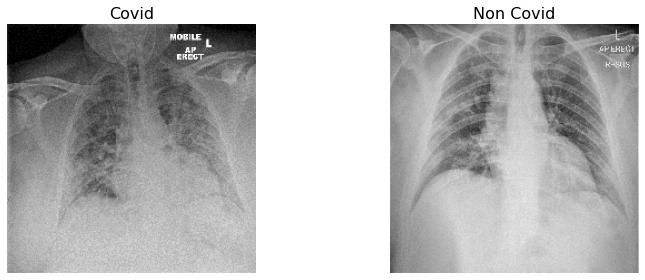

In [39]:
# Preparing input data for VGG16
X_g1 = preprocess_input(images_g1)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_g1[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

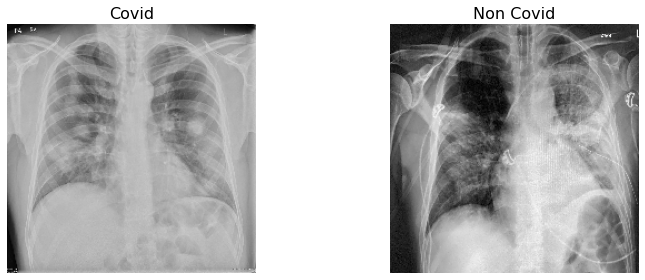

In [40]:
# Preparing input data for VGG16
X_g2 = preprocess_input(images_g2)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_g2[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

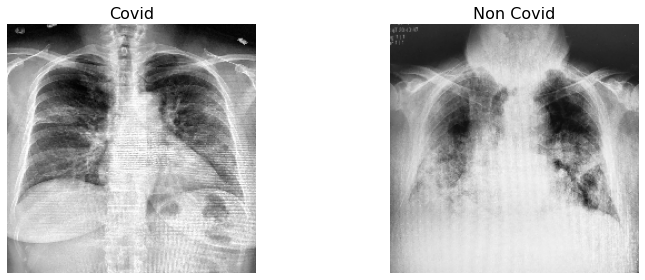

In [41]:
# Preparing input data for VGG16
X_g3 = preprocess_input(images_g3)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_g3[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

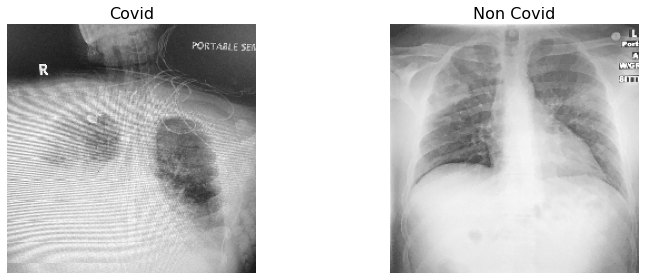

In [42]:
# Preparing input data for VGG16
X_g4 = preprocess_input(images_g4)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_g4[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

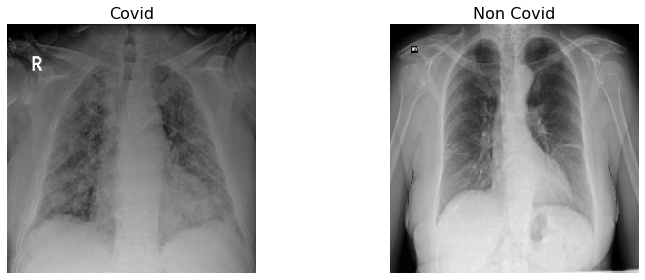

In [43]:
# Preparing input data for VGG16
X_g5 = preprocess_input(images_g5)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_g5[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [44]:
# Import necessary libraries for saliency mapping
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
replace2linear = ReplaceToLinear()
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([0,1])

# Print the result images with saliency mapping #

Saliency mapping will highlight the areas used in the decision-making process to determine whether a patient has COVID or not.

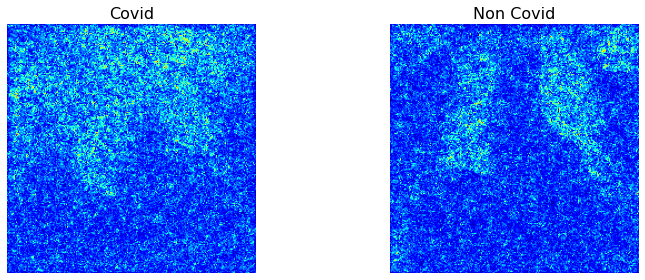

CPU times: user 3.46 s, sys: 71.5 ms, total: 3.53 s
Wall time: 3.89 s


In [45]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(saved_model, model_modifier=replace2linear, clone=True)

# Generate saliency mapping results
saliency_map_g1 = saliency(score, X_g1)

# Render
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map_g1[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

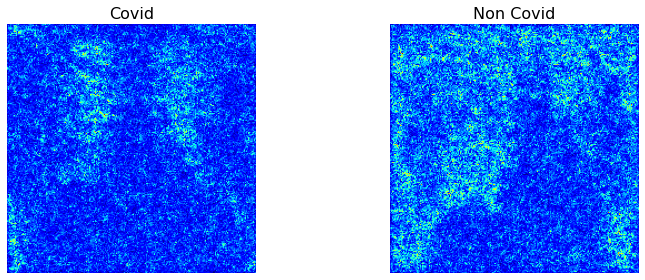

In [46]:
# Generate saliency mapping results
saliency_map_g2 = saliency(score, X_g2)

# Render
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map_g2[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

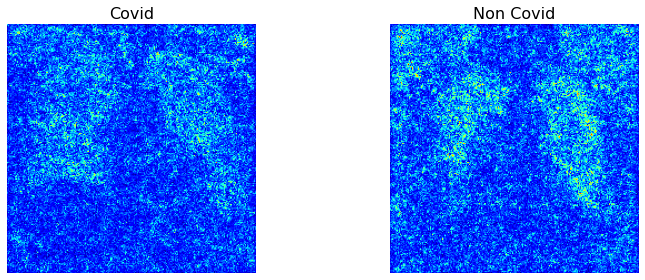

In [47]:
# Generate saliency mapping results
saliency_map_g3 = saliency(score, X_g3)

# Render
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map_g3[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

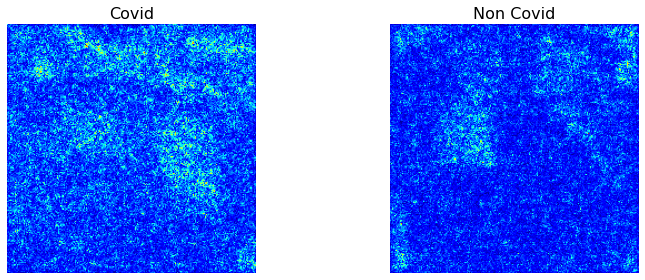

In [48]:
# Generate saliency mapping results
saliency_map_g4 = saliency(score, X_g4)

# Render
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map_g4[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

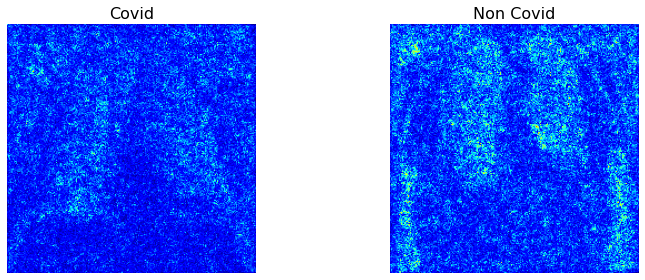

In [49]:
# Generate saliency mapping results
saliency_map_g5 = saliency(score, X_g5)

# Render
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map_g5[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Credits #

*   https://github.com/keisen/tf-keras-vis
*   https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html

